In [1]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
img = nib.load('../data/ribfrac-challenge/validation/ribfrac-val-labels/RibFrac459-label.nii.gz')

In [3]:
img.shape

(512, 512, 333)

In [4]:
image_data = img.get_fdata()
image_data.shape

(512, 512, 333)

In [5]:
np.max(image_data)
np.min(image_data)

0.0

(array([72369.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   862.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

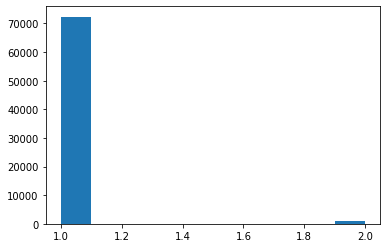

In [6]:
plt.hist(image_data[image_data != 0].flatten())

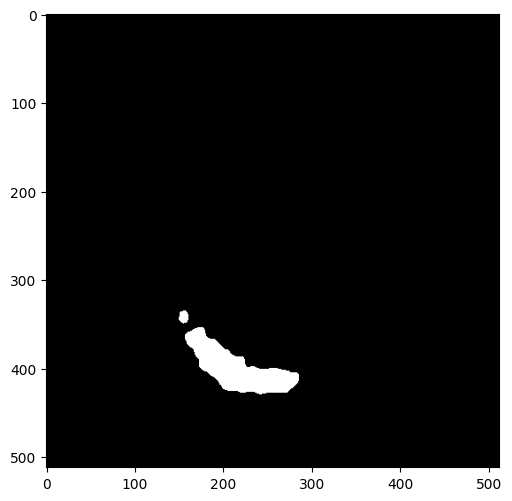

In [7]:
plt.figure(figsize = (6,6), dpi=100) 
combined_slices = np.sum(image_data, axis=-1)
combined_slices = (combined_slices > 0).astype(int)
plt.imshow(combined_slices, cmap=plt.cm.gray) 

In [8]:
def get_nonzero_slices(img_data):
    nonzero_slices = img_data.swapaxes(2, 0)
    sums = np.sum(nonzero_slices, axis=(1,2))
    nonzero_slices = nonzero_slices[sums > 0]
    return nonzero_slices

In [9]:
nonzero_slices = get_nonzero_slices(image_data)
print(nonzero_slices.shape)

(85, 512, 512)


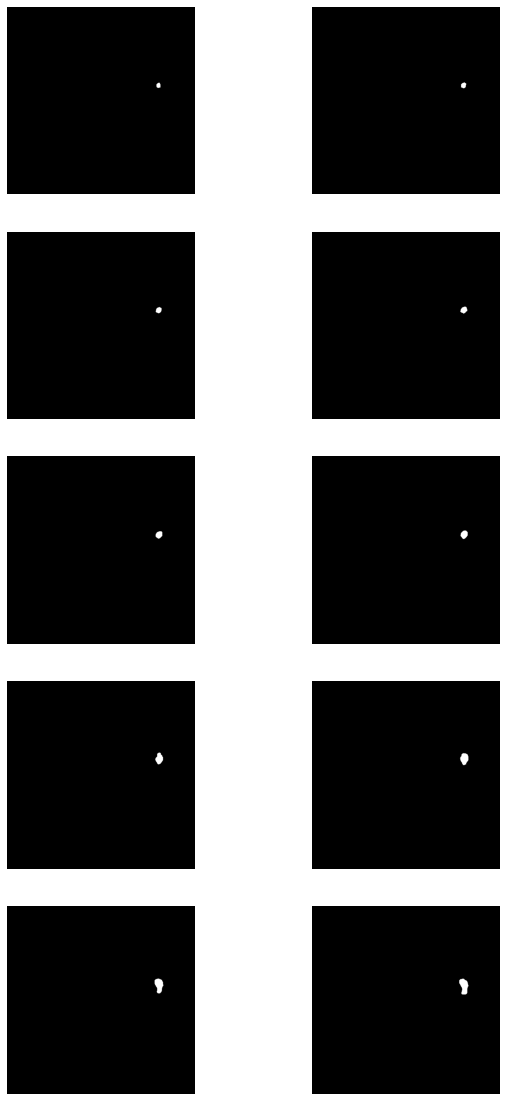

In [10]:
fig,axes = plt.subplots(nrows = 5, ncols = 2, figsize=(10, 20))
for i, image_slice in enumerate(nonzero_slices[:10]):
    col = i % 2
    row = i // 2
    axes[row, col].axis('off')
    axes[row, col].imshow(image_slice, cmap=plt.cm.gray) 
plt.show()
